In [1]:
import pandas as pd

proteins = pd.read_csv("../data/enzymes/proteins.csv")
proteins = proteins[proteins["#Peptides"]>=50]
proteins["Accession"] = proteins["Accession"].apply(lambda x: x.split("|")[1].split("_")[0])
proteins

,Protein Group,Protein ID,Accession,-10lgP,Coverage (%),Coverage (%) cht1,Coverage (%) cht2,Coverage (%) cht3,Coverage (%) cht4,Coverage (%) cht5,...,#Spec trp4,#Spec trp5,#Spec trp6,#Spec trp7,#Spec trp8,#Spec trp9,#Spec trp10,PTM,Avg. Mass,Description
0,2,7,AHNK,404.88,67,2,3,3,3,3,...,295,316,245,267,310,356,349,NaN,629114,Neuroblast differentiation-associated protein ...
1,7,3,CH60,379.98,94,55,71,71,64,69,...,73,89,78,79,87,115,110,NaN,61055,60 kDa heat shock protein mitochondrial OS=Ho...
2,10,23,BIP,355.27,93,50,69,66,68,64,...,77,82,72,75,87,89,91,NaN,72333,Endoplasmic reticulum chaperone BiP OS=Homo sa...
3,44,11,NPM,349.90,81,56,59,64,64,64,...,24,30,23,24,25,31,30,NaN,32575,Nucleophosmin OS=Homo sapiens OX=9606 GN=NPM1 ...
4,3,254,H2B1M,349.30,92,64,69,69,69,71,...,88,86,67,80,66,117,90,NaN,13989,Histone H2B type 1-M OS=Homo sapiens OX=9606 G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,808,725,NOMO2,166.03,35,0,0,1,1,2,...,9,9,8,9,8,11,13,NaN,139439,Nodal modulator 2 OS=Homo sapiens OX=9606 GN=N...
747,636,806,HSP74,164.13,45,3,4,5,6,6,...,10,10,8,8,12,10,11,NaN,94331,Heat shock 70 kDa protein 4 OS=Homo sapiens OX...
760,616,937,SYEP,162.21,31,2,2,2,2,2,...,12,13,8,6,16,15,16,NaN,170590,Bifunctional glutamate/proline--tRNA ligase OS...
761,645,821,ATD3A,162.19,50,4,3,6,6,8,...,11,9,7,9,11,13,12,NaN,71369,ATPase family AAA domain-containing protein 3A...


In [2]:
def remove_ends(peptide):
    if peptide[1] == '.':
        peptide = peptide[2:]
    if peptide[-2] == '.':
        peptide = peptide[:-2]
    return peptide


df = pd.read_csv("../data/enzymes/protein-peptides.csv")

df["Protein Accession"] = df["Protein Accession"].apply(lambda x: x.split("|")[1].split("_")[0])

df = df[df["Protein Accession"].isin(proteins["Accession"])]

df["Peptide"] = df["Peptide"].apply(remove_ends)

samples = [col for col in df.columns if col.startswith("#Featu") and col != "#Feature"]
df.set_index(["Protein Accession", "Peptide"], inplace=True)
df = df[samples]

import numpy as np

#df = df.apply(np.log2).fillna(0).replace(-np.inf, 0)
df

#Feature cht1  #Feature cht2  \
Protein Accession Peptide                                                     
AHNK              SKGHYEVTGSDDETGKLQGSGVSLASK              0              0   
                  HELTEISNVDVETQSGK                        0              0   
                  IKGDVPSVGLEGPDVDLQGPEAK                  0              0   
                  GPHVDVSGPDIDIEGPEGK                      0              0   
                  ADVDVSGPKVDVEGPDVNIEGPEGK                0              0   
...                                                      ...            ...   
AHNK2             TRLEGDL                                  0              0   
                  EATEVTLK                                 0              0   
                  GDLKNTDISIEPPS                           0              0   
                  MISSSVNVL                                0              0   
                  LQMPSFK                                  0              0   

                                               #Feature cht3  #Feature cht4  \
Protein Accession Peptide                                                     
AHNK              SKGHYEVTGSDDETGKLQGSGVSLASK              0              0   
                  HELTEISNVDVETQSGK                        0              0   
                  IKGDVPSVGLEGPDVDLQGPEAK                  0              0   
                  GPHVDVSGPDIDIEGPEGK                      0              0   
                  ADVDVSGPKVDVEGPDVNIEGPEGK                0              0   
...                                                      ...            ...   
AHNK2             TRLEGDL                                  0              0   
                  EATEVTLK                                 0              0   
                  GDLKNTDISIEPPS                           0              0   
                  MISSSVNVL                                0              0   
                  LQMPSFK                                  0              0   

                                               #Feature cht5  #Feature cht6  \
Protein Accession Peptide                                                     
AHNK              SKGHYEVTGSDDETGKLQGSGVSLASK              0              0   
                  HELTEISNVDVETQSGK                        0              0   
                  IKGDVPSVGLEGPDVDLQGPEAK                  0              0   
                  GPHVDVSGPDIDIEGPEGK                      0              0   
                  ADVDVSGPKVDVEGPDVNIEGPEGK                0              0   
...                                                      ...            ...   
AHNK2             TRLEGDL                                  0              0   
                  EATEVTLK                                 0              0   
                  GDLKNTDISIEPPS                           0              0   
                  MISSSVNVL                                0              0   
                  LQMPSFK                                  0              0   

                                               #Feature cht7  #Feature cht8  \
Protein Accession Peptide                                                     
AHNK              SKGHYEVTGSDDETGKLQGSGVSLASK              0              0   
                  HELTEISNVDVETQSGK                        0              0   
                  IKGDVPSVGLEGPDVDLQGPEAK                  0              0   
                  GPHVDVSGPDIDIEGPEGK                      0              0   
                  ADVDVSGPKVDVEGPDVNIEGPEGK                0              0   
...                                                      ...            ...   
AHNK2             TRLEGDL                                  0              0   
                  EATEVTLK                                 0              0   
                  GDLKNTDISIEPPS                           0              0   
                  MISSSVNVL                                0              0   
               

In [3]:
samples_split = [s.split(" ")[1] for s in samples]

import re

pattern = r'[0-9]'

groups = [re.sub(pattern, '', s) for s in samples_split]

design = pd.DataFrame({"sample":samples_split, "group":groups})
design.to_csv("../data/enzymes/design.csv")

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


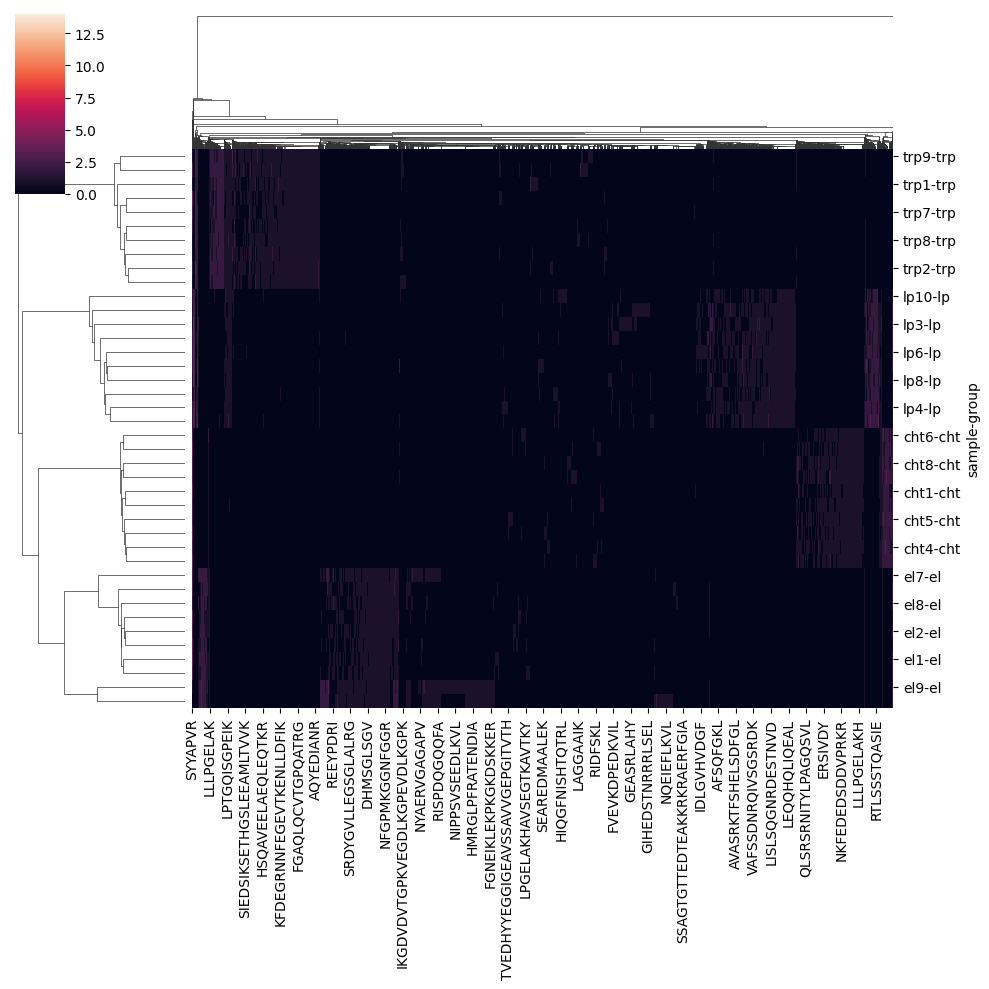

In [4]:
import seaborn as sns

sq = df.reset_index().drop(columns="Protein Accession").rename(columns={"Peptide":"sample"}).set_index("sample").T
sq.index = [s.split(" ")[1] for s in sq.index]
sq = sq.merge(design, left_index=True, right_on="sample").set_index(["sample","group"])

sns.clustermap(sq)

In [5]:
data_dict = {}

for sample in samples:
    sample_data = df[sample].dropna().reset_index()
    protein_dict = {}
    for protein in sample_data["Protein Accession"].unique():
        protein_data = sample_data[sample_data["Protein Accession"] == protein]
        peptide_dict = {}

        for i, row in protein_data.iterrows():
            peptide = row["Peptide"]
            abundance = row[sample]
            peptide_dict[peptide] = abundance
        protein_dict[protein] = peptide_dict
    data_dict[sample] = protein_dict

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


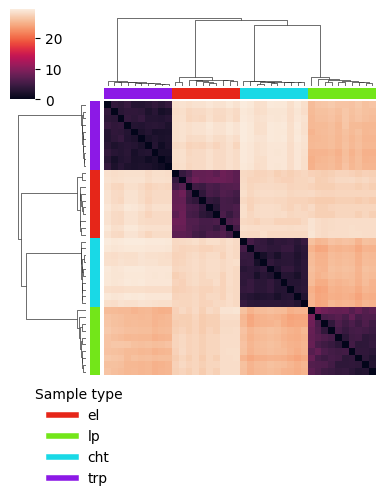

In [6]:
from disassembly.util import KL, normalize_dict
from disassembly.estimate_parameters import compare



protein = "H4"

comparisons = {}
for i in data_dict.keys():
    if protein in data_dict[i].keys():
        peptidome_comp_1 = data_dict[i][protein]
        comparisons[i] = {}
        for j in data_dict.keys():
            if protein in data_dict[j].keys():
                peptidome_comp_2 = data_dict[j][protein]
                p, q = compare(peptidome_comp_1, peptidome_comp_2)
                err = KL(p, q) + KL(q, p)
                comparisons[i][j] = err

import pandas as pd

comps_df = pd.DataFrame(comparisons)

import seaborn as sns
from matplotlib.lines import Line2D

labels = design["group"]
lut = dict(zip(set(labels), sns.hls_palette(len(set(labels)), l=0.5, s=0.8)))
row_colors = design["group"].map(lut)

g = sns.clustermap(
    comps_df,
    figsize=(5, 5),
    row_colors=row_colors.to_numpy(),
    col_colors=row_colors.to_numpy(),
)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
legend_elements = [
    Line2D([0], [0], color=c, lw=4, label=l) for l, c in zip(lut.keys(), lut.values())
]
g.ax_heatmap.legend(
    frameon=False,
    handles=legend_elements,
    loc="upper left",
    bbox_to_anchor=(-0.3, 0),
    title="Sample type",
)

In [7]:
df = df.rename(columns={s1:s2 for s1,s2 in zip(samples, samples_split)})


In [8]:
df.to_csv("../data/enzymes/processed.csv")